In [18]:
import pandas as pd
df_21322_14 = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/21322_data_table_full_2024-10-14.xlsx")  
df_21322_15 = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/21322_data_table_full_2024-10-15.xlsx")  
df_21572_09 = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/21572_data_table_full_2024-10-09.xlsx")  
df_21572_10 = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/21572_data_table_full_2024-10-10.xlsx")  
df_21169_15 = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/2305221        21169_data_table_full_2024-10-15.xlsx")  




44440
44388
41385
46543
48508


In [29]:
# Display length of each DataFrame
for df in [df_21322_14, df_21322_15, df_21572_09, df_21572_10, df_21169_15]:
    df_reverse = df[df["Active gear"] == -1]
    print("Percentage of Rows back",len(df_reverse)/len(df))
    print("Distance back m", df_reverse["distance_m"].sum(), "\nPercentage to all distance ", df_reverse["distance_m"].sum()/df["distance_m"].sum(),"\n")



Percentage of Rows back 0.02617011701170117
Distance back m 1040.13 
Percentage to all distance  0.014587503634148503 

Percentage of Rows back 0.029197080291970802
Distance back m 1378.55 
Percentage to all distance  0.013634404888466505 

Percentage of Rows back 0.01838830494140389
Distance back m 775.4399999999999 
Percentage to all distance  0.012532183375463366 

Percentage of Rows back 0.015233225189609609
Distance back m 529.95 
Percentage to all distance  0.009650808103801502 

Percentage of Rows back 0.010864187350540117
Distance back m 491.5799999999999 
Percentage to all distance  0.00702412175258682 



In [30]:
# Display length and details of each dataframe
for df_cleared in [df_21322_14, df_21322_15, df_21572_09, df_21572_10, df_21169_15]:
    df_cleared = df_cleared[df_cleared["Active gear"] == -1]
    df_cleared = df_cleared[["Date time","Velocity [km/h]", "RPM","Active gear", "RPM", "predkosc_osi", "distance_m", "Distance [km]","latitude", "longitude"]]
    print(df_cleared.describe())

                           Date time  Velocity [km/h]          RPM  \
count                           1163      1163.000000  1163.000000   
mean   2024-10-14 10:06:06.147893248         3.392267   834.135446   
min              2024-10-14 06:03:08         0.000000   540.000000   
25%       2024-10-14 07:22:39.500000         1.774000   625.001000   
50%              2024-10-14 10:30:08         3.288000   808.613000   
75%       2024-10-14 11:38:03.500000         4.972500   984.052000   
max              2024-10-14 17:52:50        48.060000  1514.566000   
std                              NaN         2.923257   219.567333   

       Active gear          RPM  predkosc_osi   distance_m  Distance [km]  \
count       1163.0  1163.000000   1163.000000  1163.000000    1163.000000   
mean          -1.0   834.135446      3.092205     0.894351      22.300743   
min           -1.0   540.000000      0.000000     0.000000       0.222000   
25%           -1.0   625.001000      0.000000     0.490000   

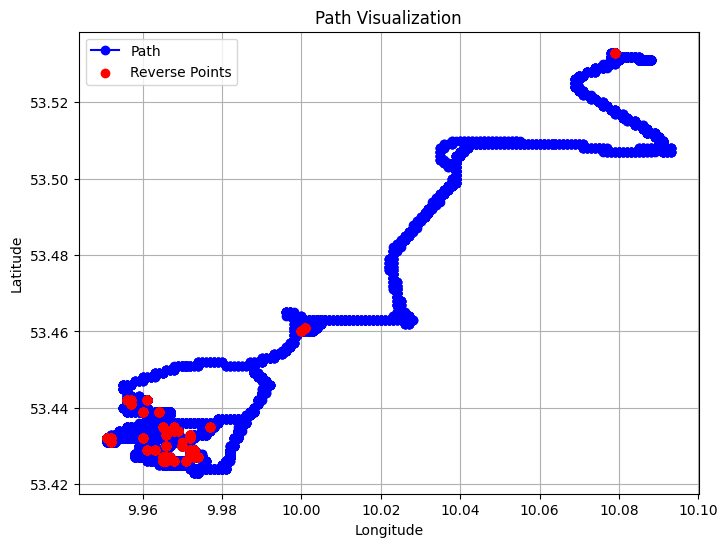

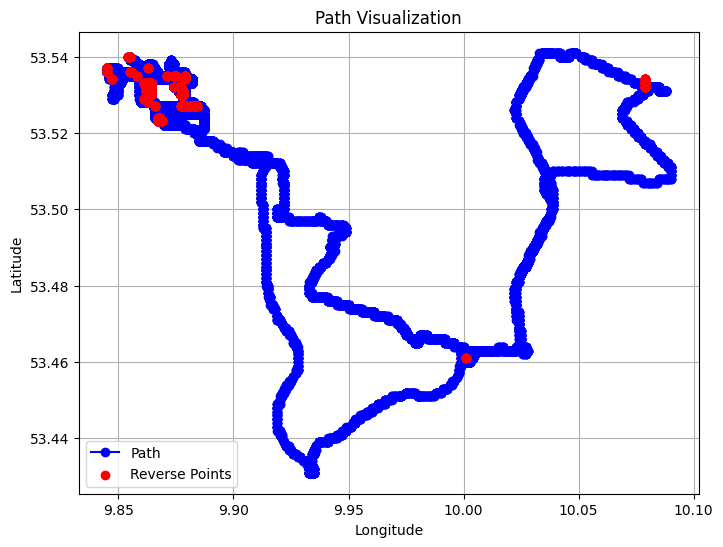

In [47]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

center_lat, center_lon = df_21322_14["latitude"].mean(), df_21322_14["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)
for i, row in df.iterrows():
    folium.Marker([row["latitude"], row["longitude"]], popup=f"Point {i}").add_to(m)
folium.PolyLine(df[["latitude", "longitude"]].values, color="blue", weight=3).add_to(m)

# Creating reverse points
df_21322_14_reverse = df_21322_14[df_21322_14["Active gear"] == -1]
for i, row in df_21322_14_reverse.iterrows():
    folium.Marker(
        [row["latitude"], row["longitude"]],
        popup=f"Reverse Point {i}",
        icon=folium.Icon(color="red")
    ).add_to(m)

plt.figure(figsize=(8, 6))
plt.plot(df_21322_14["longitude"], df_21322_14["latitude"], marker="o", linestyle="-", color="b", label="Path")
plt.scatter(df_21322_14_reverse["longitude"], df_21322_14_reverse["latitude"], color="red", label="Reverse Points", zorder=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Path Visualization")
plt.legend()
plt.grid()
plt.show()

center_lat, center_lon = df_21322_15["latitude"].mean(), df_21322_15["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)
for i, row in df.iterrows():
    folium.Marker([row["latitude"], row["longitude"]], popup=f"Point {i}").add_to(m)
folium.PolyLine(df[["latitude", "longitude"]].values, color="blue", weight=3).add_to(m)

# Creating reverse points
df_21322_15_reverse = df_21322_15[df_21322_15["Active gear"] == -1]
for i, row in df_21322_15_reverse.iterrows():
    folium.Marker(
        [row["latitude"], row["longitude"]],
        popup=f"Reverse Point {i}",
        icon=folium.Icon(color="red")
    ).add_to(m)

plt.figure(figsize=(8, 6))
plt.plot(df_21322_15["longitude"], df_21322_15["latitude"], marker="o", linestyle="-", color="b", label="Path")
plt.scatter(df_21322_15_reverse["longitude"], df_21322_15_reverse["latitude"], color="red", label="Reverse Points", zorder=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Path Visualization")
plt.legend()
plt.grid()
plt.show()


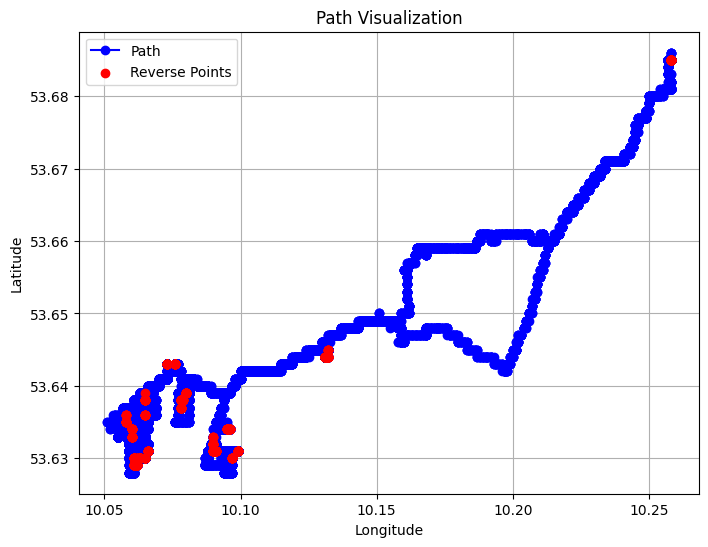

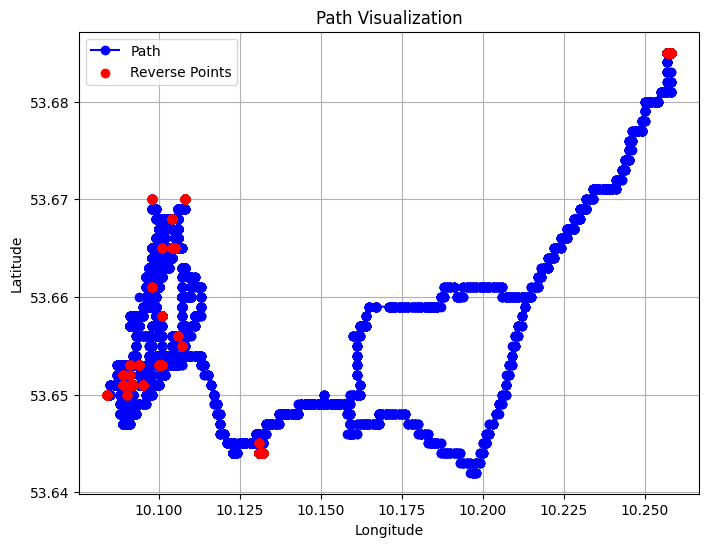

In [46]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

center_lat, center_lon = df_21572_09["latitude"].mean(), df_21572_09["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)
for i, row in df.iterrows():
    folium.Marker([row["latitude"], row["longitude"]], popup=f"Point {i}").add_to(m)
folium.PolyLine(df[["latitude", "longitude"]].values, color="blue", weight=3).add_to(m)

# Creating reverse points
df_21572_09_reverse = df_21572_09[df_21572_09["Active gear"] == -1]
for i, row in df_21572_09_reverse.iterrows():
    folium.Marker(
        [row["latitude"], row["longitude"]],
        popup=f"Reverse Point {i}",
        icon=folium.Icon(color="red")
    ).add_to(m)

plt.figure(figsize=(8, 6))
plt.plot(df_21572_09["longitude"], df_21572_09["latitude"], marker="o", linestyle="-", color="b", label="Path")
plt.scatter(df_21572_09_reverse["longitude"], df_21572_09_reverse["latitude"], color="red", label="Reverse Points", zorder=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Path Visualization")
plt.legend()
plt.grid()
plt.show()



center_lat, center_lon = df_21572_10["latitude"].mean(), df_21572_10["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)
for i, row in df.iterrows():
    folium.Marker([row["latitude"], row["longitude"]], popup=f"Point {i}").add_to(m)
folium.PolyLine(df[["latitude", "longitude"]].values, color="blue", weight=3).add_to(m)

# Creating reverse points
df_21572_10_reverse = df_21572_10[df_21572_10["Active gear"] == -1]
for i, row in df_21572_10_reverse.iterrows():
    folium.Marker(
        [row["latitude"], row["longitude"]],
        popup=f"Reverse Point {i}",
        icon=folium.Icon(color="red")
    ).add_to(m)

plt.figure(figsize=(8, 6))
plt.plot(df_21572_10["longitude"], df_21572_10["latitude"], marker="o", linestyle="-", color="b", label="Path")
plt.scatter(df_21572_10_reverse["longitude"], df_21572_10_reverse["latitude"], color="red", label="Reverse Points", zorder=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Path Visualization")
plt.legend()
plt.grid()
plt.show()


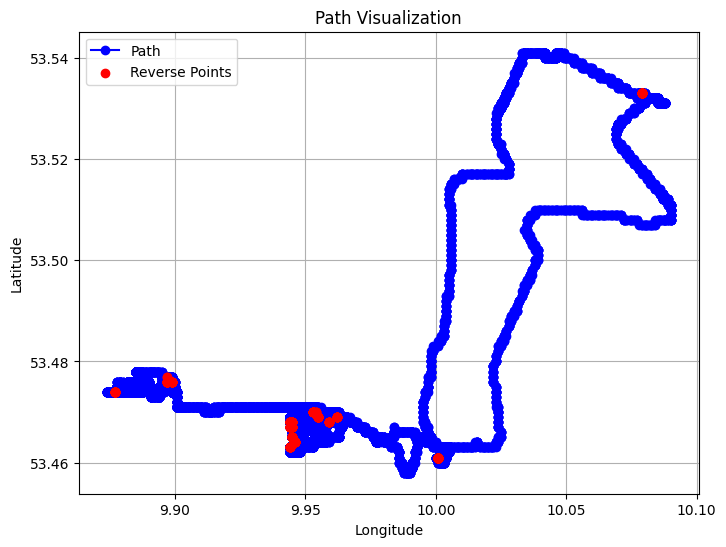

In [ ]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

center_lat, center_lon = df_21169_15["latitude"].mean(), df_21169_15["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)
for i, row in df.iterrows():
    folium.Marker([row["latitude"], row["longitude"]], popup=f"Point {i}").add_to(m)
folium.PolyLine(df[["latitude", "longitude"]].values, color="blue", weight=3).add_to(m)

# Creating reverse points
df_21169_15_reverse = df_21169_15[df_21169_15["Active gear"] == -1]
for i, row in df_21169_15_reverse.iterrows():
    folium.Marker(
        [row["latitude"], row["longitude"]],
        popup=f"Reverse Point {i}",
        icon=folium.Icon(color="red")
    ).add_to(m)

plt.figure(figsize=(8, 6))
plt.plot(df_21169_15["longitude"], df_21169_15["latitude"], marker="o", linestyle="-", color="b", label="Path")
plt.scatter(df_21169_15_reverse["longitude"], df_21169_15_reverse["latitude"], color="red", label="Reverse Points", zorder=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Path Visualization")
plt.legend()
plt.grid()
plt.show()

